# Movies and Data Analytics

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



Each year, the entertainment industry produces more movies, bigger movies, and more types of media compete for audience attention. Between 2000 and 2010, just 36% of movies had profitable box-office returns. So missing the mark is more costly than ever, and every decision takes more into account. Success hinges on professional experience and the industry insights of those around. In all, it is a pretty closed system with a lot of opportunity for subjective interpretation.

Analytics gives businesses the quantitative data necessary to make better, more informed decisions and improve the services they provide to their audience. Like most industries today, Hollywood has access to more supportive data for decision-making than ever before. Ingesting and interpreting all of that information has until very recently, been an intimidating task. Thankfully, the right visualization of that data is making analysis easier and faster. By analyzing a large group of movies and television shows and using specific rules to define parameters, patterns emerge. By examining thousands of movies and television shows over several decades, analysts, marketers, and producers can detect anomalies and get statistically meaningful results that help provide recommendations. As the saying goes, knowledge is power, and data analytics gives you the ability to turn raw data into valuable knowledge.

For the purpose of this project I will try to explore the following questions:
* What's the global box office figures between 2005 and 2015?
* What's are the highest grossing movies that contributed to the global box office between 2005 and 2015?
* What is the most popular genre amoungst the top grssing movies?



Referrences: (https://storyfit.com/using-analytics-to-predict-movie-success/)

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In this section I'm taking the necessary steps to explore the movies dataset and check for data cleanliness and accracy.


In [212]:
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [213]:
print('No. of rows = {}'.format(df.shape[0]))
print('No. of columns = {}'.format(df.shape[1]))

No. of rows = 10866
No. of columns = 21



### Data Cleaning

### Checking the data types

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Removing zero values

Upon investigating the dataset I realised that the <B> buget </B> and <B>revenue</B> columns have rows with zero values.
The code below removes such rows since they would hinder my analysis.

In [215]:
df = df[~(df == 0).any(axis=1)]

In [216]:
print('No. of rows = {}'.format(df.shape[0]))
print('No. of columns = {}'.format(df.shape[1]))

No. of rows = 3855
No. of columns = 21


### Working with pipe '|' symbols

In this step I'm converting the genres that are seperated by pipe symbol in to a list

In [217]:
df['genre2'] = df['genres'].str.split('|').tolist()

I'm now extracting the values in the list and populating them into columns.
I'm then merging the result with <B>df</B> dataset and creating a new dataset, <B>new_df</B>.

In [218]:
new_df = df.genre2.apply(pd.Series).merge(df, left_index=True, right_index=True)

### Checking for duplicate movies titles

In [219]:
dupes = new_df[new_df.duplicated(['original_title'],keep=False)][['original_title','release_year']]
dupes.sort_values(['original_title','release_year']).head(6)

,original_title,release_year
7891,A Nightmare on Elm Street,1984
1994,A Nightmare on Elm Street,2010
8920,Annie,1982
724,Annie,2014
8393,Arthur,1981
3539,Arthur,2011


Although it's quite evident that there are duplicate entries, I've made the decision not to remove them since these are re-makes of old movies. Hollywood is infamous of doing this due to lack of originality.

<a id='eda'></a>
## Exploratory Data Analysis

In this section I'll be exploring the questions I've posed above.




### What's the global box office figures between 2005 and 2015?

The film industry is a significant contributor to the world economy. In this question I'm going to explore how the industry has fared between the years 2005 and 2015.

Film Production is created in 5 phases: development, pre-production, production, post-production and distribution. Each phase has a different purpose, with the overarching goal to get to the next one, and ultimately on to distribution. 
A movie's butget only takes the above 5 phases in to consideration. There are other hidden expenses that are not part of the budget. P&A - (Printing & Advertising) cost a.k.a marketing cost is one such expense. 

References : (https://io9.gizmodo.com/how-much-money-does-a-movie-need-to-make-to-be-profitab-5747305?IR=T)

#### STEP 1: 

To answer this question I'll be working with the <B>budget_adj</B> and <B>revenue_adj</B> columns. 
In order to give a more realistic view of revenue earned, I've added another column, <B><I>new_budget_adj</B></I> that caluculates the marketing cost and adds it to the budgeted value. I've assumed that the marketing cost is 50% of the production cost (budjet_adj).



In [220]:
new_df['new_budget_adj'] = new_df['budget_adj']+(new_df['budget_adj']*0.5)

In [221]:
new_df.head(2)

,0,1,2,3,4,id,imdb_id,popularity,budget,revenue,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre2,new_budget_adj
0,Action,Adventure,Science Fiction,Thriller,NaN,135397,tt0369610,32.985763,150000000,1513528810,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,"[Action, Adventure, Science Fiction, Thriller]",2.069999e+08
1,Action,Adventure,Science Fiction,Thriller,NaN,76341,tt1392190,28.419936,150000000,378436354,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,"[Action, Adventure, Science Fiction, Thriller]",2.069999e+08


#### STEP 2: 
The next step is to calculate the profit/loss made. I've introduced a new column called <B>profit_or_loss</B>.
This is calculated by substracting <B>new_budget_adj</B> from <B>revenue_adj</B>

In [222]:
new_df['profit_or_loss'] = new_df['revenue_adj'] - new_df['new_budget_adj']

In [223]:
new_df.head(2)

,0,1,2,3,4,id,imdb_id,popularity,budget,revenue,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre2,new_budget_adj,profit_or_loss
0,Action,Adventure,Science Fiction,Thriller,NaN,135397,tt0369610,32.985763,150000000,1513528810,...,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,"[Action, Adventure, Science Fiction, Thriller]",2.069999e+08,1.185446e+09
1,Action,Adventure,Science Fiction,Thriller,NaN,76341,tt1392190,28.419936,150000000,378436354,...,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,"[Action, Adventure, Science Fiction, Thriller]",2.069999e+08,1.411614e+08


#### Step 3

As stated in the question I'll be limiting it to the period of 2005 to 2015

In [224]:
df_global_bx_of = new_df[new_df['release_year'].between(2005, 2015)]

#### Step 4

I'm grouping by <B>release_year</B> and calculating the sum of the adjusted revenue and sum of the adjusted budget.

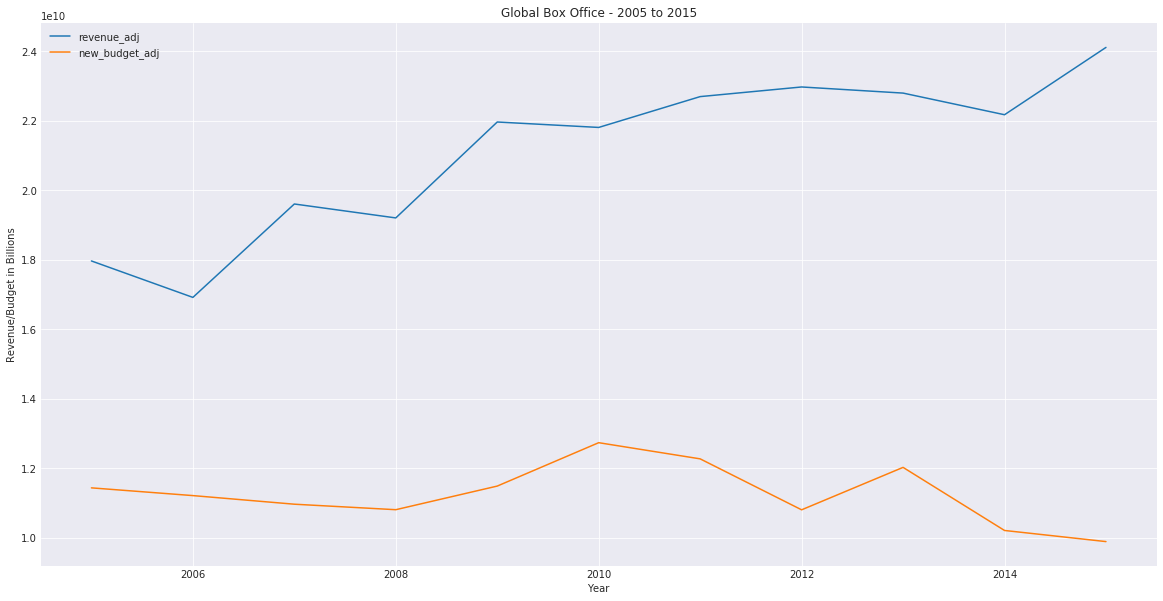

In [225]:
gbo = df_global_bx_of.groupby('release_year').agg({"revenue_adj":"sum","new_budget_adj":"sum"}).plot(figsize=(20,10), title='Global Box Office - 2005 to 2015');
gbo.set_xlabel('Year');
gbo.set_ylabel('Revenue/Budget in Billions');

The histograms below shows the frequency of the budget compared to the revenue.

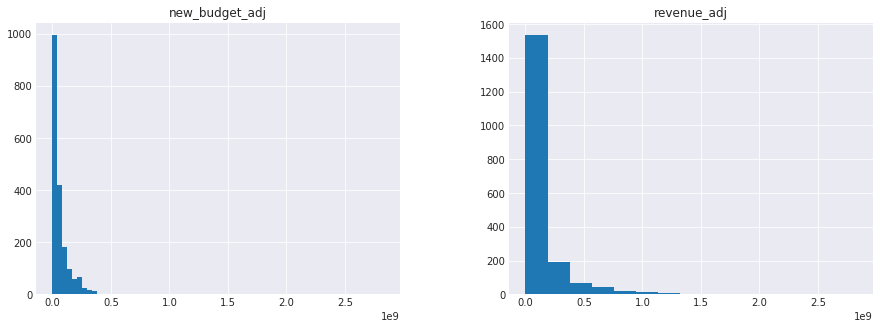

In [226]:
df_global_bx_of.hist(bins=15,column=["new_budget_adj","revenue_adj"], sharex=True,figsize=(15,5));

#### Step 5
The table below shows the number of movies that were released each year

In [227]:
df_global_bx_of.groupby('release_year').agg({"profit_or_loss":"count"})

,profit_or_loss
release_year,
2005,163
2006,169
2007,165
2008,167
2009,174
2010,179
2011,199
2012,158
2013,180


#### Findings

As depicted in the graph back in 2005 the global revenue was around 6.5 Billion USD. 
That has increased by two folds to 14 Billion USD by 2015. 
It is important to note on average there were 171 movies released every year within this time period.



### What's are the highest grossing movies that contributed to the global box office between 2005 and 2015?

To answer this question I created a new column <B> profit_per </B>, that calculates the profit in percentage.
This is calculated by dividing the <B>profit_or_loss</B> column by <B>revenue_adj</B>.


In [228]:
new_df['profit_per'] = (new_df['profit_or_loss']/new_df['revenue_adj'])*100

##### Assumption

For this analysis I'm making an assumption that a movie must make above 50% in profit to be considered a box office success.
Therefore I'm filtering the above results to only show movies that made a profit greater than 50%.

I'm also only focsing on movies that had a budget of over 250 million USD.

In [229]:
df_box_office = new_df.query('new_budget_adj > 250000000')

In [230]:
df_box_office = df_box_office.query('profit_per > 50')

As stated in the question I'll be limiting it to the period of 2005 to 2015

In [231]:
df_box_office = df_box_office[df_box_office['release_year'].between(2005, 2015)]

In [232]:
df_box_office.shape

(32, 30)

In [233]:
df_box_office.sort_values('profit_or_loss', inplace=True)

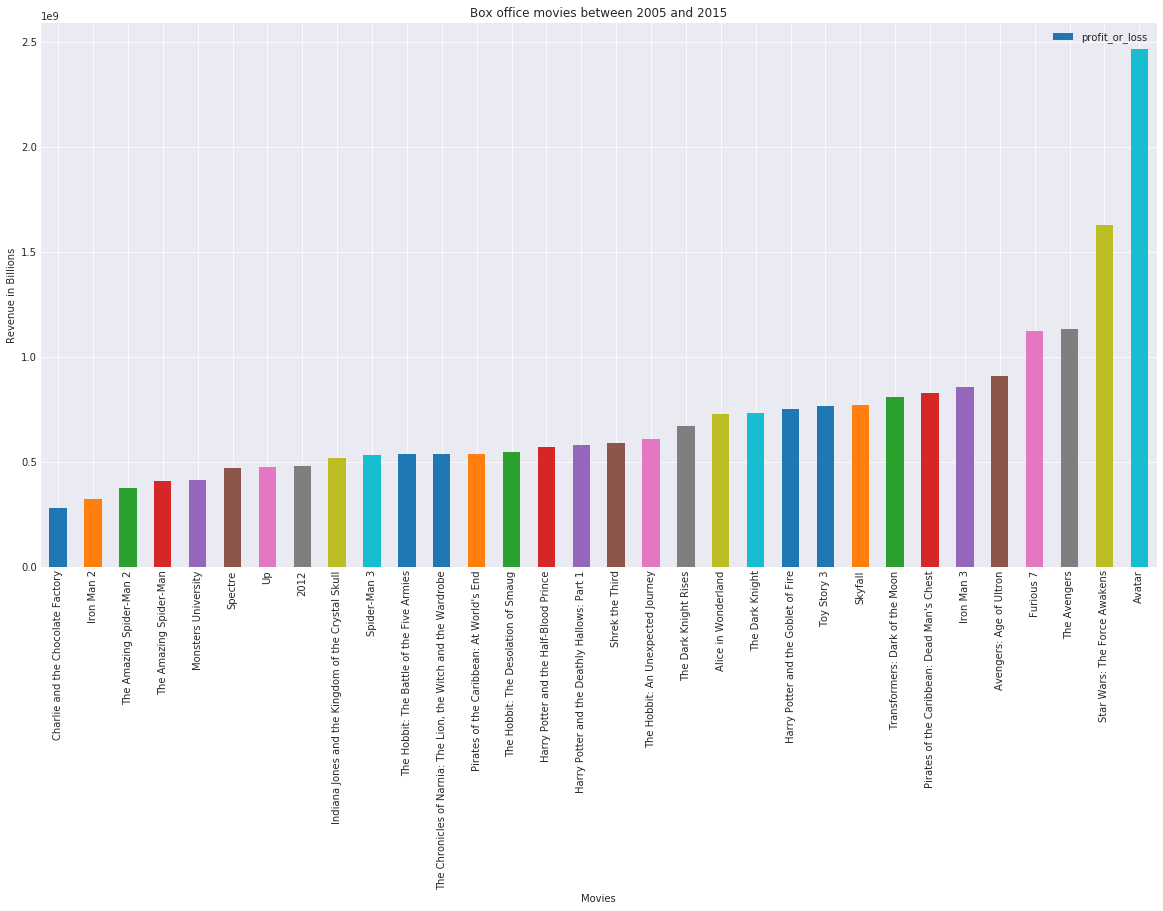

In [234]:
mv = df_box_office.plot.bar(x='original_title', y='profit_or_loss', figsize=[20,10], title='Box office movies between 2005 and 2015');
mv.set_xlabel('Movies');
mv.set_ylabel('Revenue in Billions');

Getting the count of movies per year

In [235]:
df_box_office.groupby('release_year').agg({"original_title":"count"})

,original_title
release_year,
2005,3
2006,1
2007,3
2008,2
2009,4
2010,4
2011,1
2012,5
2013,3


#### Findings

It's quite evident that up until 2015 Avatar has by far been the most financialy successful movie of all time earning a whooping 2.4 Billion USD globally.
There is a 0.8 Billion USD difference between Avatar and the Star War: The Force Awakens.


### What is the most popular genre amoungst the top grssing movies?

In this question I'll be exploing the same results (period) above to understand which genre was a favorite amounst movie goers.

#### Step 1

I'm going to start this analysis by looking at only necessary columns and dropping the rest

In [236]:
genre_df = df_box_office

In [237]:
genre_df.columns

Index([                     0,                      1,                      2,
                            3,                      4,                   'id',
                    'imdb_id',           'popularity',               'budget',
                    'revenue',       'original_title',                 'cast',
                   'homepage',             'director',              'tagline',
                   'keywords',             'overview',              'runtime',
                     'genres', 'production_companies',         'release_date',
                 'vote_count',         'vote_average',         'release_year',
                 'budget_adj',          'revenue_adj',               'genre2',
             'new_budget_adj',       'profit_or_loss',           'profit_per'],
      dtype='object')

#### Step 2

I'm droping all columns except <B>original_title</B> and genres

In [238]:
genre_df.drop(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'new_budget_adj', 'profit_or_loss', 'profit_per','genres','genre2'], axis=1, inplace=True)

In [239]:
genre_df.head(1)

,0,1,2,3,4,original_title
6195,Adventure,Comedy,Family,Fantasy,NaN,Charlie and the Chocolate Factory


#### Step 5

For this analysis I'll only be taking the first value of the genre in to consideration

In [240]:
genre_df.rename(columns = ({0:'new_genre'}), inplace=True)

In [241]:
genre_df.head(2)

,new_genre,1,2,3,4,original_title
6195,Adventure,Comedy,Family,Fantasy,NaN,Charlie and the Chocolate Factory
1920,Adventure,Action,Science Fiction,NaN,NaN,Iron Man 2


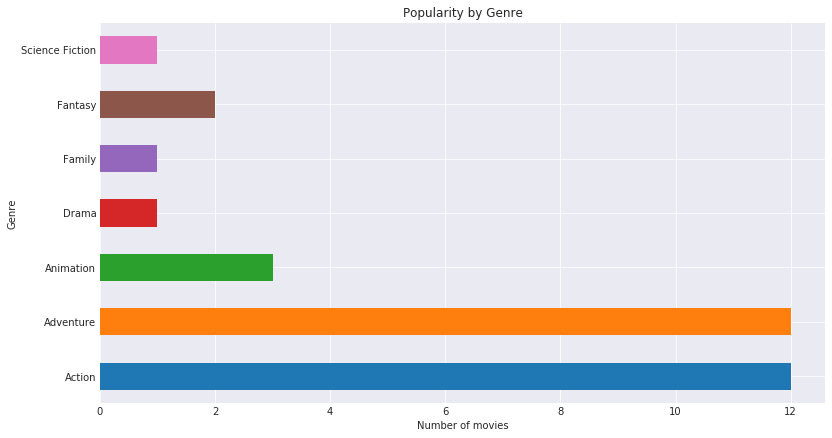

In [242]:
genre_bar = genre_df.groupby('new_genre')['original_title'].count().plot(kind='barh', title='Popularity by Genre', figsize=(13,7));
genre_bar.set_xlabel('Number of movies');
genre_bar.set_ylabel('Genre');

#### Findings

The analysis reveals that <B>Action</B> and <B>Adventure</B> movies are the most popular genres amoungst movie goers

<a id='conclusions'></a>
## Conclusions

It's quite evident that the movie industry is a very lucrative market. The focus of this report is to investigate and highlight the amount of revenue the movie industry adds to the global economy. In order to do this I needed to do focus on the budget and revenue columns. After analysing the dataset I had to drop 7011 records because they didn't contain figures for either the budget or the revenue or both. I was then left with 3855 records to perform my analysis. 

My analysis revealed that year on year there's a steady increase in revenue. Out of the approximately 170 movies that are released every year only 2% of them raked in the highest revenue as shown above. One movie that has reigned supreme is Avatar earning an astonishing 2.4 Billion dollars.

Finally, as per the last analysis, the genre also is a big determining factor that drives movie goers to the cinema. 

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [244]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0